In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
sns.set()
import hvplot.pandas
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [43]:
df = pd.read_csv('./DOGE-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-21,0.208773,0.218094,0.198161,0.201027,0.201027,1766963639
1,2021-09-22,0.200822,0.229423,0.200224,0.224858,0.224858,2016471206
2,2021-09-23,0.224748,0.227095,0.218115,0.224832,0.224832,1169581249
3,2021-09-24,0.224726,0.228267,0.197720,0.209451,0.209451,1883155313
4,2021-09-25,0.209348,0.212604,0.204875,0.208640,0.208640,1067132277


In [44]:
number_simulation = 100
predict_day = 60

close = df['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = returns.std()
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|██████████| 100/100 [00:02<00:00, 48.94it/s]


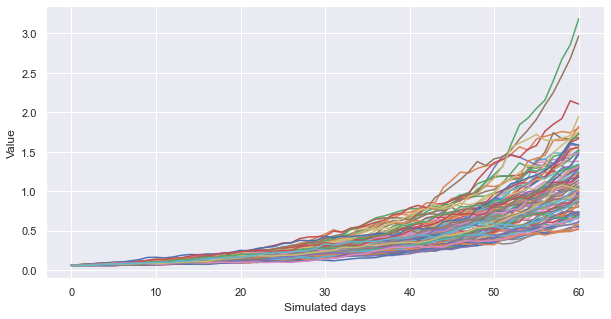

In [45]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()


C:\Users\brand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\brand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

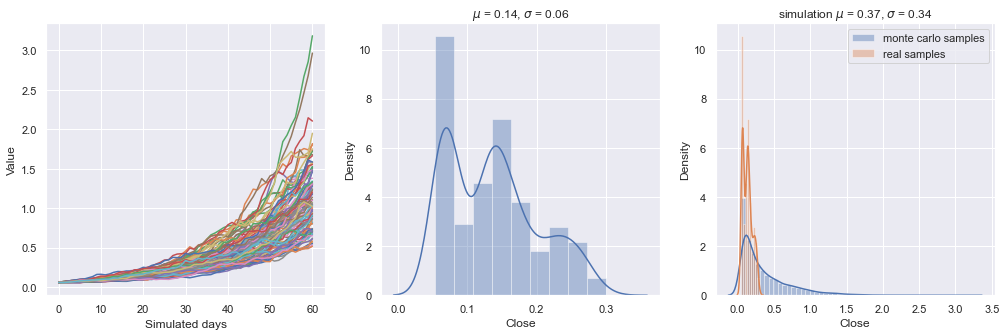

In [46]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()

In [159]:
doge_df = pd.read_csv(
    Path("./DOGE-USD.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
doge_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-21,0.208773,0.218094,0.198161,0.201027,0.201027,1766963639
2021-09-22,0.200822,0.229423,0.200224,0.224858,0.224858,2016471206
2021-09-23,0.224748,0.227095,0.218115,0.224832,0.224832,1169581249
2021-09-24,0.224726,0.228267,0.197720,0.209451,0.209451,1883155313
2021-09-25,0.209348,0.212604,0.204875,0.208640,0.208640,1067132277


In [160]:
# Filter the date index and close columns
signals_df = doge_df.loc[:, ["Close"]]

# Use the pct_change function to generate  returns from close prices
signals_df["Actual Returns"] = signals_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()
           
# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns
Date,,
2021-09-22,0.224858,0.118546
2021-09-23,0.224832,-0.000116
2021-09-24,0.209451,-0.068411
2021-09-25,0.208640,-0.003872
2021-09-26,0.204962,-0.017628


,Close,Actual Returns
Date,,
2022-09-17,0.062210,0.029575
2022-09-18,0.057520,-0.075390
2022-09-19,0.058612,0.018985
2022-09-20,0.058417,-0.003327
2022-09-21,0.059202,0.013438


In [230]:
# Set the short window and long window
short_window = 5
long_window = 30

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-01-28,0.141656,0.002896,0.141508,0.158707,1,-0.002896
2022-01-29,0.143056,0.009883,0.142559,0.157765,1,0.009883
2022-01-30,0.139471,-0.025060,0.141844,0.156731,-1,-0.025060
2022-01-31,0.141805,0.016735,0.141447,0.155690,1,-0.016735
2022-02-01,0.142631,0.005825,0.141724,0.154631,1,0.005825


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-09-17,0.062210,0.029575,0.060545,0.063658,1,0.029575
2022-09-18,0.057520,-0.075390,0.060023,0.063310,-1,-0.075390
2022-09-19,0.058612,0.018985,0.059511,0.062946,1,-0.018985
2022-09-20,0.058417,-0.003327,0.059436,0.062578,-1,-0.003327
2022-09-21,0.059202,0.013438,0.059192,0.062272,1,-0.013438


In [231]:
# Initialize the new Signal column
signals_df['Signal'] = 0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >=0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-01-28,0.141656,0.002896,0.141508,0.158707,1,-0.002896
2022-01-29,0.143056,0.009883,0.142559,0.157765,1,0.009883
2022-01-30,0.139471,-0.025060,0.141844,0.156731,-1,-0.025060
2022-01-31,0.141805,0.016735,0.141447,0.155690,1,-0.016735
2022-02-01,0.142631,0.005825,0.141724,0.154631,1,0.005825


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-09-17,0.062210,0.029575,0.060545,0.063658,1,0.029575
2022-09-18,0.057520,-0.075390,0.060023,0.063310,-1,-0.075390
2022-09-19,0.058612,0.018985,0.059511,0.062946,1,-0.018985
2022-09-20,0.058417,-0.003327,0.059436,0.062578,-1,-0.003327
2022-09-21,0.059202,0.013438,0.059192,0.062272,1,-0.013438


In [232]:
signals_df['Signal'].value_counts()

 1    121
-1    116
Name: Signal, dtype: int64

In [233]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-01-28,0.141656,0.002896,0.141508,0.158707,1,NaN
2022-01-29,0.143056,0.009883,0.142559,0.157765,1,0.009883
2022-01-30,0.139471,-0.025060,0.141844,0.156731,-1,-0.025060
2022-01-31,0.141805,0.016735,0.141447,0.155690,1,-0.016735
2022-02-01,0.142631,0.005825,0.141724,0.154631,1,0.005825


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-09-17,0.062210,0.029575,0.060545,0.063658,1,0.029575
2022-09-18,0.057520,-0.075390,0.060023,0.063310,-1,-0.075390
2022-09-19,0.058612,0.018985,0.059511,0.062946,1,-0.018985
2022-09-20,0.058417,-0.003327,0.059436,0.062578,-1,-0.003327
2022-09-21,0.059202,0.013438,0.059192,0.062272,1,-0.013438


<AxesSubplot:xlabel='Date'>

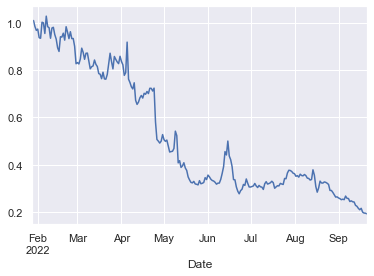

In [234]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

In [235]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

X.head()

,SMA_Fast,SMA_Slow
Date,,
2022-01-29,0.141508,0.158707
2022-01-30,0.142559,0.157765
2022-01-31,0.141844,0.156731
2022-02-01,0.141447,0.155690
2022-02-02,0.141724,0.154631


In [236]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

y.value_counts()

 1    121
-1    116
Name: Signal, dtype: int64

In [237]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2022-01-29 00:00:00


In [238]:
# Select the ending period for the training data with an offset of 36 months
training_end = X.index.min() + DateOffset(months=3)

print(training_end)

2022-04-29 00:00:00


In [239]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2022-01-29,0.141508,0.158707
2022-01-30,0.142559,0.157765
2022-01-31,0.141844,0.156731
2022-02-01,0.141447,0.155690
2022-02-02,0.141724,0.154631


In [240]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

X_test.head()

,SMA_Fast,SMA_Slow
Date,,
2022-04-30,0.141563,0.142281
2022-05-01,0.135483,0.141939
2022-05-02,0.134484,0.141654
2022-05-03,0.132732,0.141388
2022-05-04,0.131163,0.140824


In [241]:
# Scale the features DataFrames

# Create a StandardScaler instanc
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [242]:
# Create the svm classifier model
svm_model = svm.SVC()

# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

svm_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [243]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)
print(svm_testing_report)

              precision    recall  f1-score   support

          -1       0.77      0.14      0.24        71
           1       0.54      0.96      0.69        74

    accuracy                           0.56       145
   macro avg       0.65      0.55      0.46       145
weighted avg       0.65      0.56      0.47       145



<AxesSubplot:xlabel='Date'>

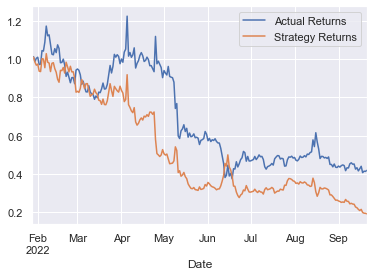

In [257]:
# Plot the actual returns versus the strategy returns
(1 + signals_df [["Actual Returns", 'Strategy Returns']]).cumprod().plot()

In [258]:
# Create a new empty predictions DataFrame.

predictions_df = pd.DataFrame(index=X_test.index)
# Add the SVM model predictions to the DataFrame
predictions_df['Predicted_signal'] = svm_pred
# Add the actual returns to the DataFrame
predictions_df["Actual Returns"] = signals_df["Actual Returns"]
# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = signals_df['Strategy Returns']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted_signal,Actual Returns,Strategy Returns
Date,,,
2022-04-30,-1,-0.055322,0.055322
2022-05-01,-1,0.040892,-0.040892
2022-05-02,-1,-0.013821,-0.013821
2022-05-03,-1,-0.010830,0.010830
2022-05-04,-1,0.048556,-0.048556


,Predicted_signal,Actual Returns,Strategy Returns
Date,,,
2022-09-17,1,0.029575,0.029575
2022-09-18,1,-0.075390,-0.075390
2022-09-19,1,0.018985,-0.018985
2022-09-20,1,-0.003327,-0.003327
2022-09-21,1,0.013438,-0.013438


In [259]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

# Initiate the model instance
logistic_regression_model = LogisticRegression()

In [260]:
# Fit the model using the training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [261]:
# Use the testing dataset to generate the predictions for the new model
pred = logistic_regression_model.predict(X_test)

pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [262]:
# a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(y_test, pred)

print(lr_testing_report)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        71
           1       0.51      1.00      0.68        74

    accuracy                           0.51       145
   macro avg       0.26      0.50      0.34       145
weighted avg       0.26      0.51      0.34       145



C:\Users\brand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\brand\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [266]:
# Create a new empty predictions DataFrame.
predictions_df_1 = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df_1['Predicted_signal'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df_1["Actual Returns"] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df_1['Strategy Returns'] = signals_df['Strategy Returns']

# Review the DataFrame
predictions_df_1

,Predicted_signal,Actual Returns,Strategy Returns
Date,,,
2022-04-30,-1,-0.055322,0.055322
2022-05-01,-1,0.040892,-0.040892
2022-05-02,-1,-0.013821,-0.013821
2022-05-03,-1,-0.010830,0.010830
2022-05-04,-1,0.048556,-0.048556
...,...,...,...
2022-09-17,1,0.029575,0.029575
2022-09-18,1,-0.075390,-0.075390
2022-09-19,1,0.018985,-0.018985


<AxesSubplot:xlabel='Date'>

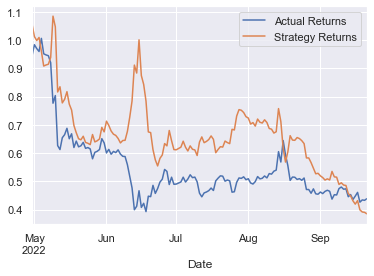

In [267]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df_1[["Actual Returns", 'Strategy Returns']]).cumprod().plot()